In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import wrangle_zillow

#pd.options.display.float_format = '{:20,.2f}'.format

### Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

In [2]:
df = acquire.get_zillow_data()

In [3]:
df = wrangle_zillow.wrangle_zillow(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51480 entries, 0 to 52118
Data columns (total 32 columns):
propertylandusetypeid           51480 non-null float64
heatingorsystemtypeid           51480 non-null float64
parcelid                        51480 non-null int64
id                              51480 non-null int64
logerror                        51480 non-null float64
transactiondate                 51480 non-null object
bathroomcnt                     51480 non-null float64
bedroomcnt                      51480 non-null float64
buildingqualitytypeid           51480 non-null float64
calculatedfinishedsquarefeet    51480 non-null float64
finishedsquarefeet12            51480 non-null float64
fips                            51480 non-null object
fullbathcnt                     51480 non-null float64
latitude                        51480 non-null float64
longitude                       51480 non-null float64
lotsizesquarefeet               51480 non-null float64
propertycountylan

In [5]:
# We will rename the variable (maybe later)
# df.columns = ['propertylandusetypeid', 'heatingorsystemtypeid', 'parcelid', 'id',
#        'logerror', 'transactiondate', 'bath_cnt', 'bedroom_cnt',
#        'buildingqualitytypeid', 'sq_ft_area',
#        'sq_ft_area12', 'count', 'full_bath_cnt', 'latitude', 'longitude',
#        'lot_size', 'propertycountylandusecode',
#        'rawcensustractandblock', 'zip_code', 'room_cnt',
#        'year_built', 'structure_tax_value', 'tax_value',
#        'assess_year', 'land_tax_value', 'taxamount',
#        'censustractandblock', 'heating_sys_desc', 'propertylandusedesc',
#        'haversine_distance', 'zip_code']

In [6]:
df_plot = df[['logerror',  'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12',  'fullbathcnt', 
       'lotsizesquarefeet', 'roomcnt','yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount']]

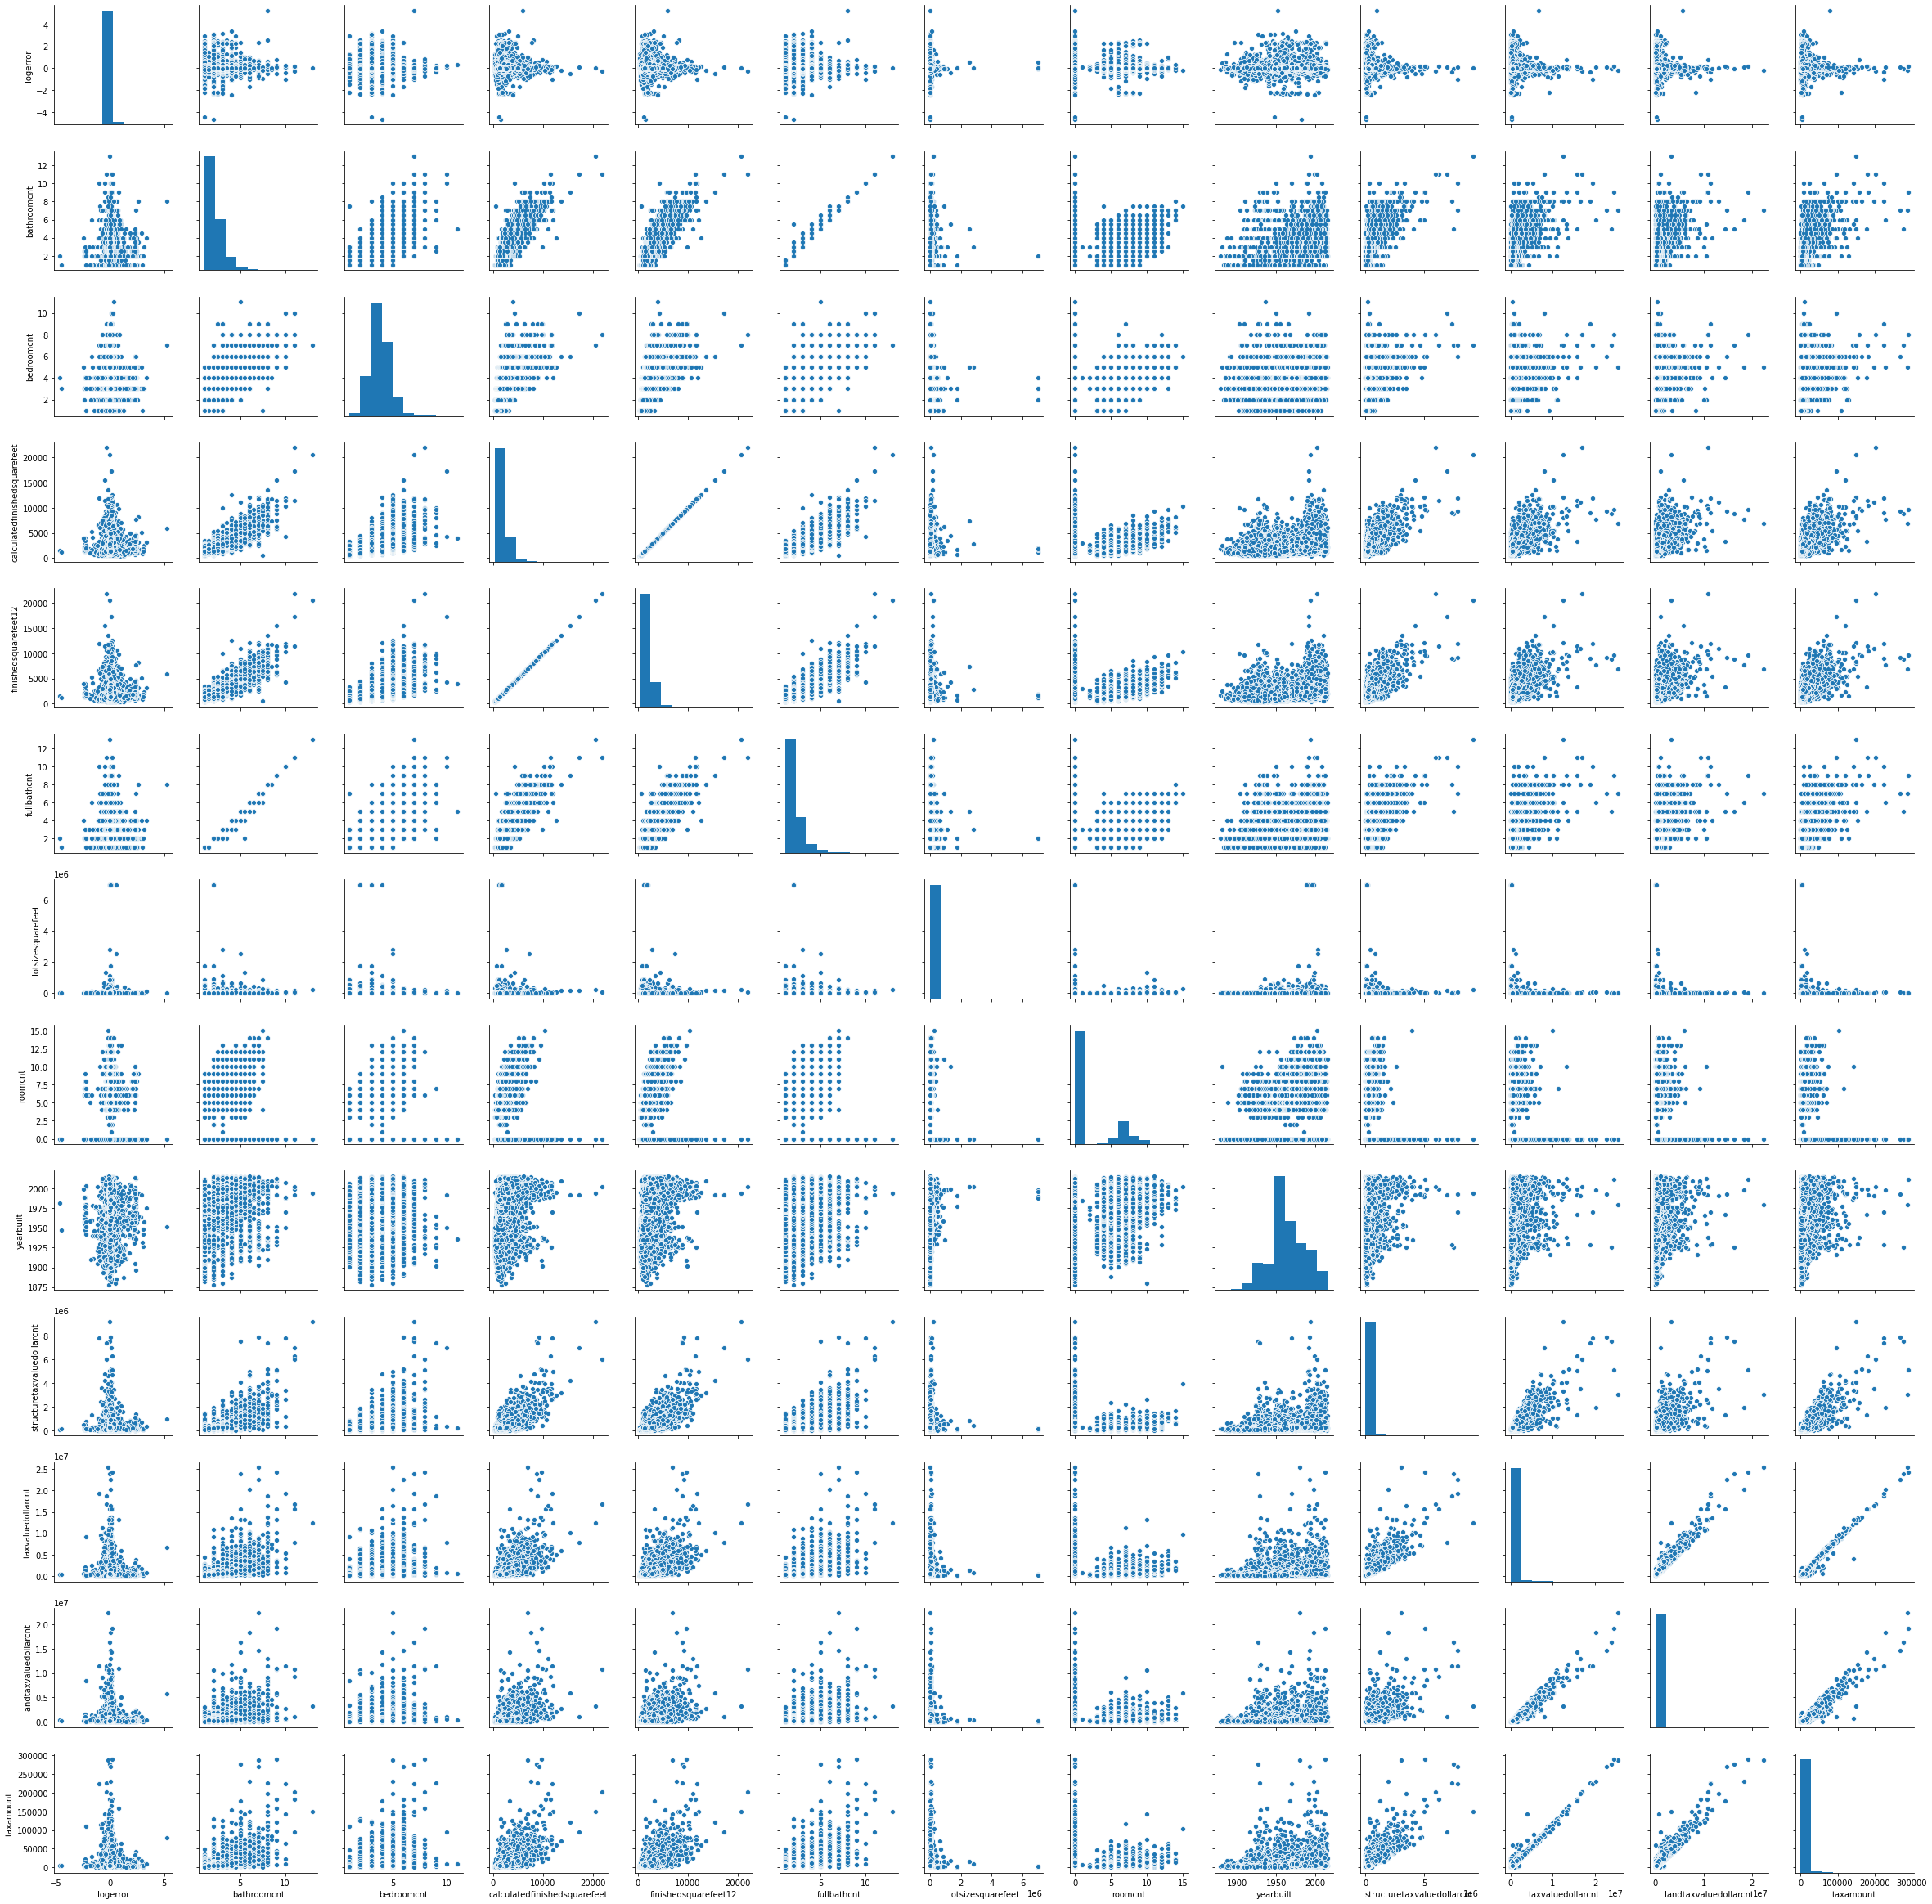

In [7]:
sns.pairplot(df_plot)
plt.show()

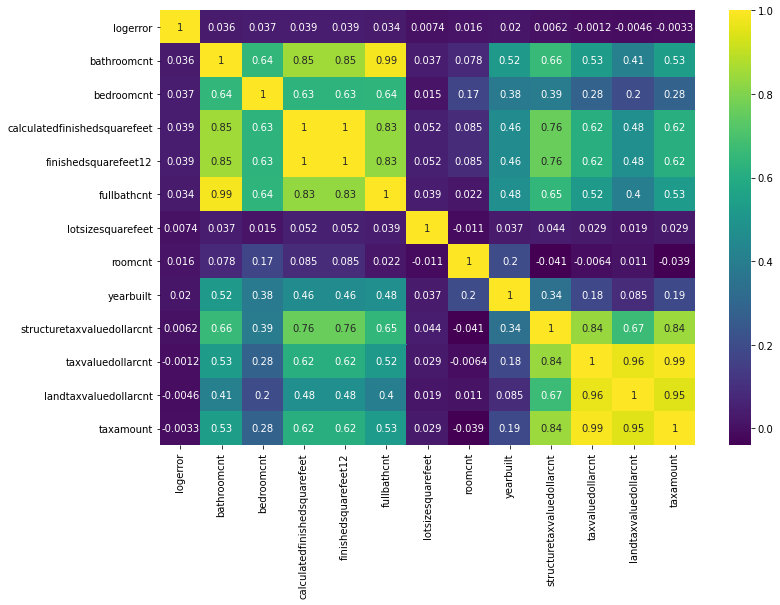

In [8]:
plt.figure(figsize =(12,8))
sns.heatmap(df_plot.corr(), cmap = 'viridis', annot = True)

### Plot latitude against longitude.

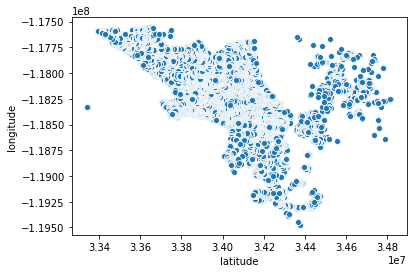

In [9]:
sns.scatterplot(x = 'latitude', y = 'longitude', data = df)

### Create a useable plot with 4 dimensions, e.g. x, y, color, size.

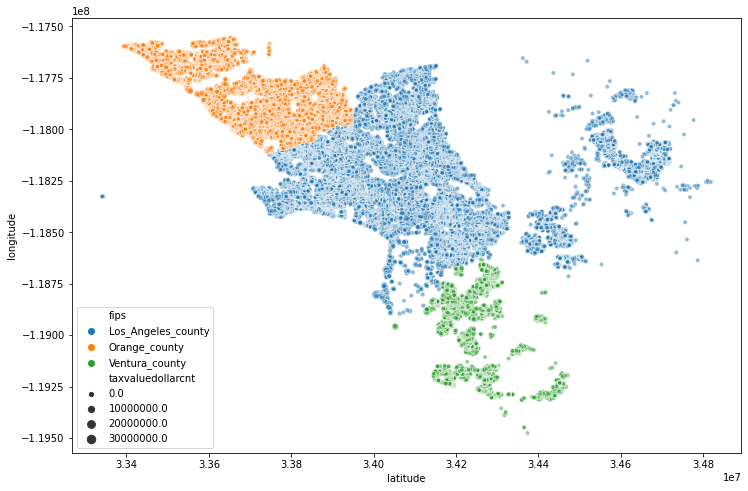

In [10]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = df, size ='taxvaluedollarcnt', hue='fips', alpha=0.5)
plt.show()

### Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [11]:
overall_logerror = df.logerror.mean()
print('logerror for whole dataset = ' "{:.4f}".format(overall_logerror))

logerror for whole dataset = 0.0182


In [12]:
# convert values from float to int
df.regionidzip = df.regionidzip.astype(int)

In [13]:
pd.options.display.float_format = '{:20,.5f}'.format
zip_means = pd.DataFrame(df.groupby('regionidzip').logerror.mean()).reset_index()

In [14]:
zip_means.head()

,regionidzip,logerror
0,95982,0.00078
1,95983,0.00523
2,95984,-0.07781
3,95985,-0.03518
4,95986,-0.00632


$H_0$: There is no significant difference in overall mean logerror and zipcode logerror\
$H_a$: There is no significant difference in overall mean logerror and zipcode logerror

In [15]:
zip_list = []
for i in range(0, len(zip_means.regionidzip)):
    if stats.ttest_1samp(df[df.regionidzip == zip_means.regionidzip[i]].logerror, overall_logerror)[-1]<0.05:
        zip_list.append(df.regionidzip[i])

In [16]:
# List of zip codes where logerror mean is significantly higher or lower than mean logerror
zip_list

[96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96346,
 96346,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96342,
 96342,
 96342,
 96342,
 96342,
 96342,
 96338,
 96338,
 96338,
 96338,
 96338,
 96342,
 96342,
 96338,
 96342,
 96342,
 96342,
 96339,
 96339,
 96342,
 96342,
 96342,
 96389,
 96342,
 96342,
 96342,
 96389]

### Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [17]:
stats.ttest_ind(df[df.fips=='Los_Angeles_county'].logerror, df[df.fips=='Orange_county'].logerror)

Ttest_indResult(statistic=-6.493180256148895, pvalue=8.487571229715423e-11)

p value is almost zero, this means that mean for LA county is different than Orange county

In [18]:
stats.ttest_ind(df[df.fips=='Los_Angeles_county'].logerror, df[df.fips=='Ventura_county'].logerror)

Ttest_indResult(statistic=-0.055214089412155845, pvalue=0.9559681971769408)

p value is very high, this means that mean for LA county is not different than Ventura county

In [19]:
stats.ttest_ind(df[df.fips=='Orange_county'].logerror, df[df.fips=='Ventura_county'].logerror)

Ttest_indResult(statistic=3.5323143081299953, pvalue=0.00041296326438494484)

p value is <0.05, this means that mean for Ventura county is different than Orange county

### We should rather use one way ANOVA to test three different means

In [20]:
stats.f_oneway(df[df.fips=='Orange_county'].logerror, df[df.fips=='Orange_county'].logerror, df[df.fips=='Los_Angeles_county'].logerror)

F_onewayResult(statistic=31.142518759287274, pvalue=3.0330463924174475e-14)

p value is almost zero. So we can conclude that mean of logerror for three counties is different

In [39]:
df.regionid_city = df.regionid_city.astype(str)

In [40]:
df.regionid_city = 'z_' + df.regionid_city

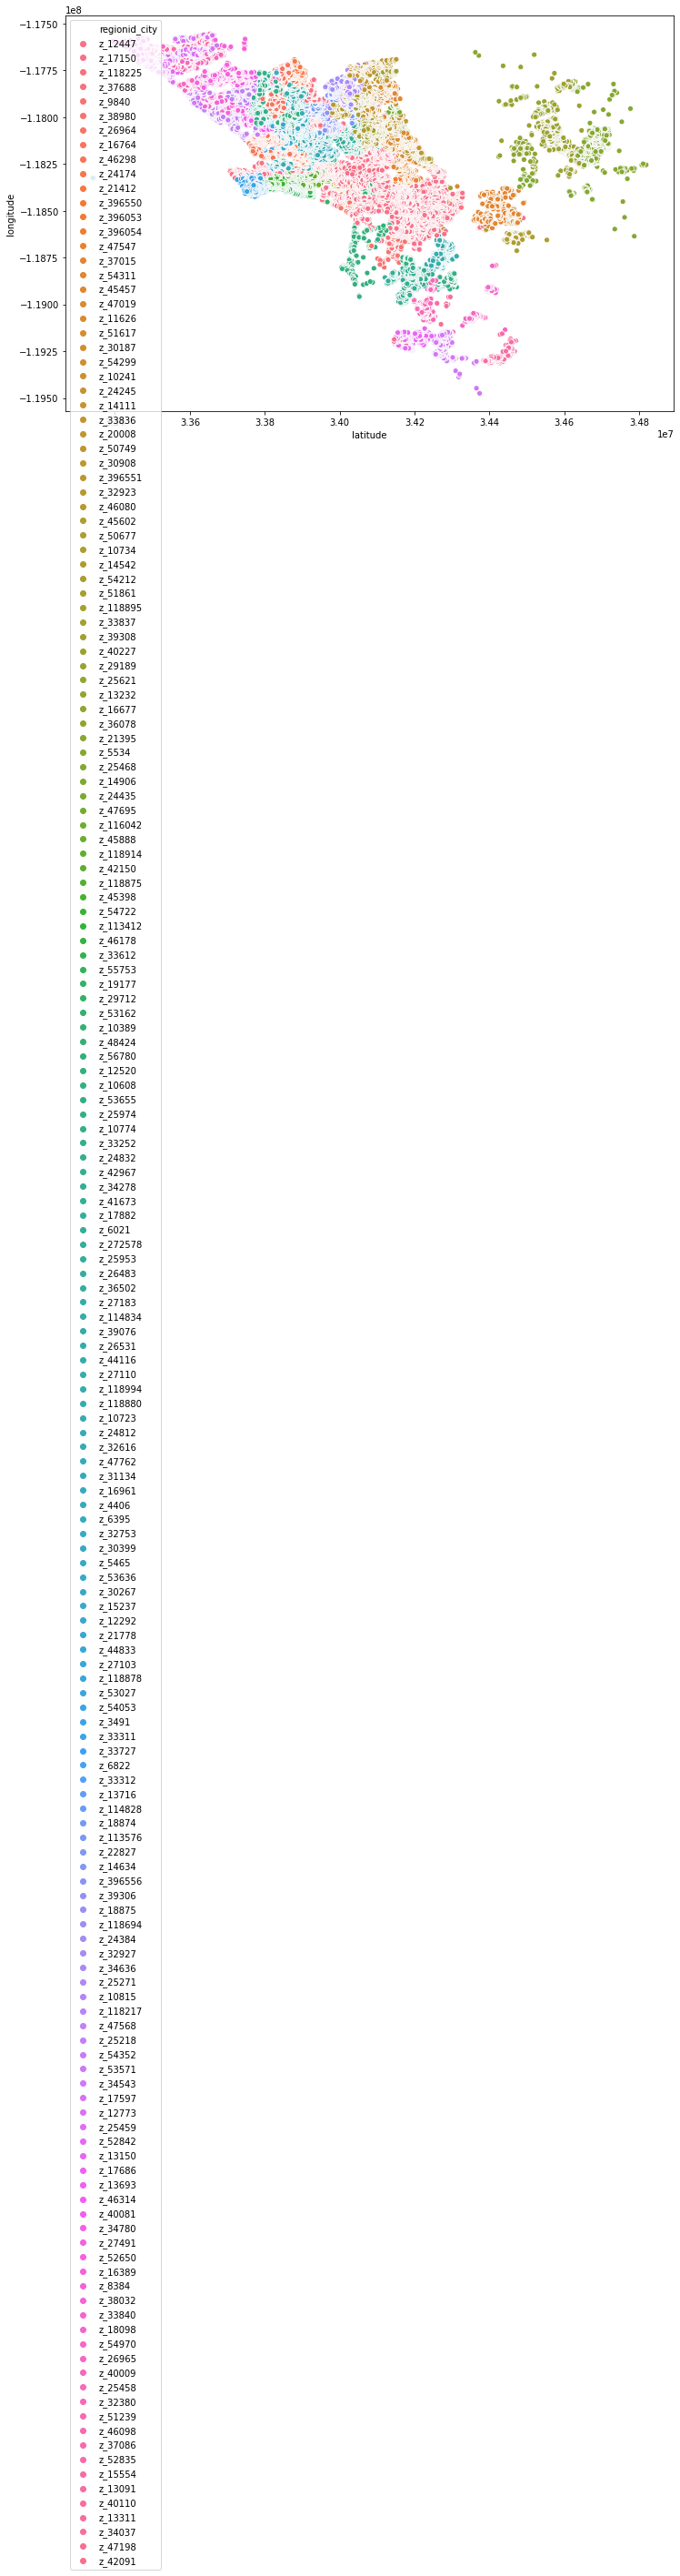

In [41]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = df, hue='regionid_city')


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51480 entries, 0 to 52118
Data columns (total 32 columns):
propertylandusetypeid           51480 non-null float64
heatingorsystemtypeid           51480 non-null float64
parcelid                        51480 non-null int64
id                              51480 non-null int64
logerror                        51480 non-null float64
transactiondate                 51480 non-null object
bathroomcnt                     51480 non-null float64
bedroomcnt                      51480 non-null float64
buildingqualitytypeid           51480 non-null float64
calculatedfinishedsquarefeet    51480 non-null float64
finishedsquarefeet12            51480 non-null float64
fips                            51480 non-null object
fullbathcnt                     51480 non-null float64
latitude                        51480 non-null float64
longitude                       51480 non-null float64
lotsizesquarefeet               51480 non-null float64
propertycountylan

In [43]:
df.rawcensustractandblock

0           60,371,132.32101
1           60,371,132.32101
2           60,371,132.32101
3           60,371,132.32101
4           60,371,132.32101
                ...         
52113       61,110,074.05300
52115       61,110,014.02200
52116       61,110,050.04111
52117       61,110,055.02101
52118       61,110,075.12105
Name: rawcensustractandblock, Length: 51480, dtype: float64